# Predicting School Performance from Socioeconomic Factors
## Introduction
The purpose of this project is to investigate whether school performance, measured by average ACT scores, can be predicted by socioeconomic factors. Understanding these relationships is important because it can help policymakers, educators, and communities identify areas where interventions might improve student outcomes.

In addition to commonly used socioeconomic predictors, this analysis includes two additional factors from the EdGap dataset:

1. Unemployment Rate – Higher unemployment in a community may reduce household resources and increase stress, which can negatively impact students’ academic performance.

2. Percent of Adults with College Degrees – Communities with higher adult educational attainment may provide a more supportive learning environment, positively influencing student outcomes.

## Data source
1. **EdGap data**:  This dataset contains socioeconomic factors for schools, including household income, unemployment, adult educational attainment, and family structure.
   - Source: Census Bureau’s American Community Survey.    
   - The quality of the census data and the department of education data can be assumed to be reasonably high.  
   - Access: `EdGap_data.xlsx`  
 

2. **School Information Data**:  
   Basic identifying information about schools.  
   - Source: National Center for Education Statistics (NCES).  
   - Data Quality: Public dataset, reasonably high quality.  
   - Access: `school_information.csv` from Dropbox: [Download Link](https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1)  

*No additional external datasets were used; the unemployment rate and percent of adults with college degrees from EdGap is included as an additional predictor.*


## Data Cleaning and Preparation
### Load libraries and Datasets
Before beginning, import the required Python libraries for data handling, visualization, and analysis.

#### Importing libraries

In [126]:
# import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn for a data visualization library built on matplotlib
import seaborn as sns
#set the plot style
sns.set_style("whitegrid")

#### Load EdGap Dataset

In [127]:
edgap = pd.read_excel('../data/EdGap_data.xlsx')

#### Load School Information Dataset

In [128]:
school_information = pd.read_csv('../data/school_information.csv',  encoding='unicode_escape')

/var/folders/sc/pdyvxd7s6yg_4vmwpgn89ld80000gn/T/ipykernel_9838/3707666045.py:1: DtypeWarning:

Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.



### Explore the contents of the datasets
We start by looking at the head of dataframe.

In [129]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [130]:
school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


Then use the info method to check the data types, size of the data frames, and number of missing values.

In [131]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [132]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

### Select Relevant Subset of Data
The school information dataset includes many columns, but we only need year, school identity, location and school type information.

We will keep the columns: SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT.

In [133]:
school_information = school_information[
    ["SCHOOL_YEAR", "NCESSCH", "LSTATE", "LZIP", "SCH_TYPE_TEXT", "LEVEL", "CHARTER_TEXT"]
]

school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


### Rename Columns
To ensure consistent and descriptive variable names, we rename the columns in both datasets to lowercase snake_case format.

In [134]:
edgap = edgap.rename(
    columns={ 
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [135]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter",
    }
)

Check head of each dataframe for changes

In [136]:
edgap.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [137]:
school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


After we renamed the columns for clarity and to follow formatting guilines. Now We are ready to join the data frames.

### Join Data Frames
Before merging, ensure both datasets share the same data type for the key column id

In [138]:
school_information['id']= school_information['id'].astype('object')
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


We use a left join to keep all rows from the EdGap dataset.

In [139]:
df = edgap.merge(school_information, how='left', on='id')
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            7227 non-null   int64  
 1   rate_unemployment             7227 non-null   float64
 2   percent_college               7227 non-null   float64
 3   percent_married               7227 non-null   float64
 4   median_income                 7227 non-null   float64
 5   average_act                   7227 non-null   float64
 6   percent_lunch                 7227 non-null   float64
 7   year                          7227 non-null   object 
 8   state                         7227 non-null   object 
 9   zip_code                      7227 non-null   int64  
 10  school_type                   7227 non-null   object 
 11  school_level                  7227 non-null   object 
 12  charter                       7227 non-null   object 
 13  rat

### Handle Out of Range Value
Outliers or invalid entries are replaced with NaN for proper handling

In [141]:
df.loc[df['percent_lunch']<0, 'percent_lunch'] = np.nan
df.loc[df['average_act']<1, 'average_act'] = np.nan

### Check the types, levels and charter status of schools

In [142]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [143]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [144]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

### Filter Highscool
Since ACT scores are only relevant for high schools, we filter the dataset accordingly.

In [145]:
df = df.loc[df['school_level']=='High']

### Check for Duplicate Row

In [173]:
df.duplicated().sum()

np.int64(0)

### Identify Missing Values

In [147]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


We're going to plot the result on the map to see which states of USA has missing value

In [148]:
# Import needed libraries
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(
    geo ={'scope':'usa'}, coloraxis_colorbar = dict(title='Number of Schools')
)

data = dict(
    type='choropleth',
    locations=df['state'].value_counts().index,
    locationmode='USA-states',
    z=df['state'].value_counts().values,
    coloraxis='coloraxis'
)

x = pg.Figure(data=[data], layout=layout)
po.iplot(x)

We are missing a large amount of USA data due to omission. This is not evident by examine NaN values in the data set. So We're gonna drop the row where the average ACT score is missing

### Drop Missing Value
Schools without ACT scores are removed because we cannot predict performance without the target variable.

In [149]:
df = df.dropna(subset=['average_act'])
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variables where datas were present. So, we will not drop the rows of this data set that are missing the socioeconomic variables. We will impute the missing values.

### Data Imputation
Instead of dropping rows with missing socioeconomic data, we use an Iterative Imputer to preserve relationships between variables.

Define the predictor variables to be rate_unemployment, percent_college, percent_married, median_income, percent_lunch, state, and charter.

In [150]:
predictor_variables= [
    'rate_unemployment', 
    'percent_college', 
    'percent_married', 
    'median_income', 
    'percent_lunch', 
    'state', 
    'charter'
]

Use Iterative imputer to replace missing values in the columns corresponding to predictor variables in analysis

In [174]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#defining the imputer
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables 

In [153]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print (numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fit the Imputer

In [154]:
imputer.fit(df.loc[:, numerical_predictors])

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


Impute the missing value in the training data

In [155]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

# now we are able to replace the NaN values

### Check for missing values
After imputation, confirm that no missing values remain

In [156]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


There is  no more mising value.

### Explore the Dataset
We now export the cleaned dataset for future analysis.

In [175]:
df.to_csv(
    'education_clean.csv',
    encoding= 'utf-8-sig',
    index= False
)

We successfully saved the clean data frame as a csv file.

## Exploratory Data Analysis
We reload the clean dataset and explore variable relationships.

In [176]:
# Model Processing
from sklearn.preprocessing import StandardScaler

#Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model Metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('../data/education_clean.csv')
df.head()


,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


### Examine Distribution and Relationship 
#### Correlation Analysis
We visualize correlations among predictors and the target variable (average_act)

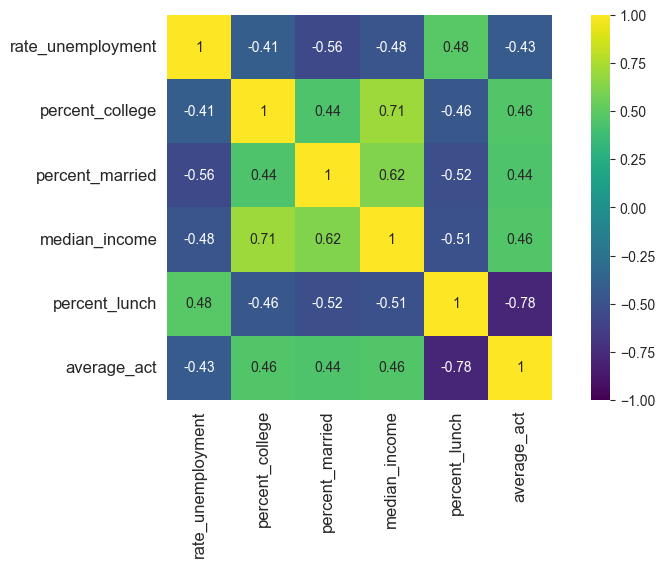

In [161]:
predictor_variables=['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']
numerical_predictors= df[predictor_variables].select_dtypes(include='number').columns.to_list()
corr_matrix = df[numerical_predictors + ['average_act']].corr()
plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.show()

#### Correlation Analysis
Make Pair Plot to explore the relationship between variable

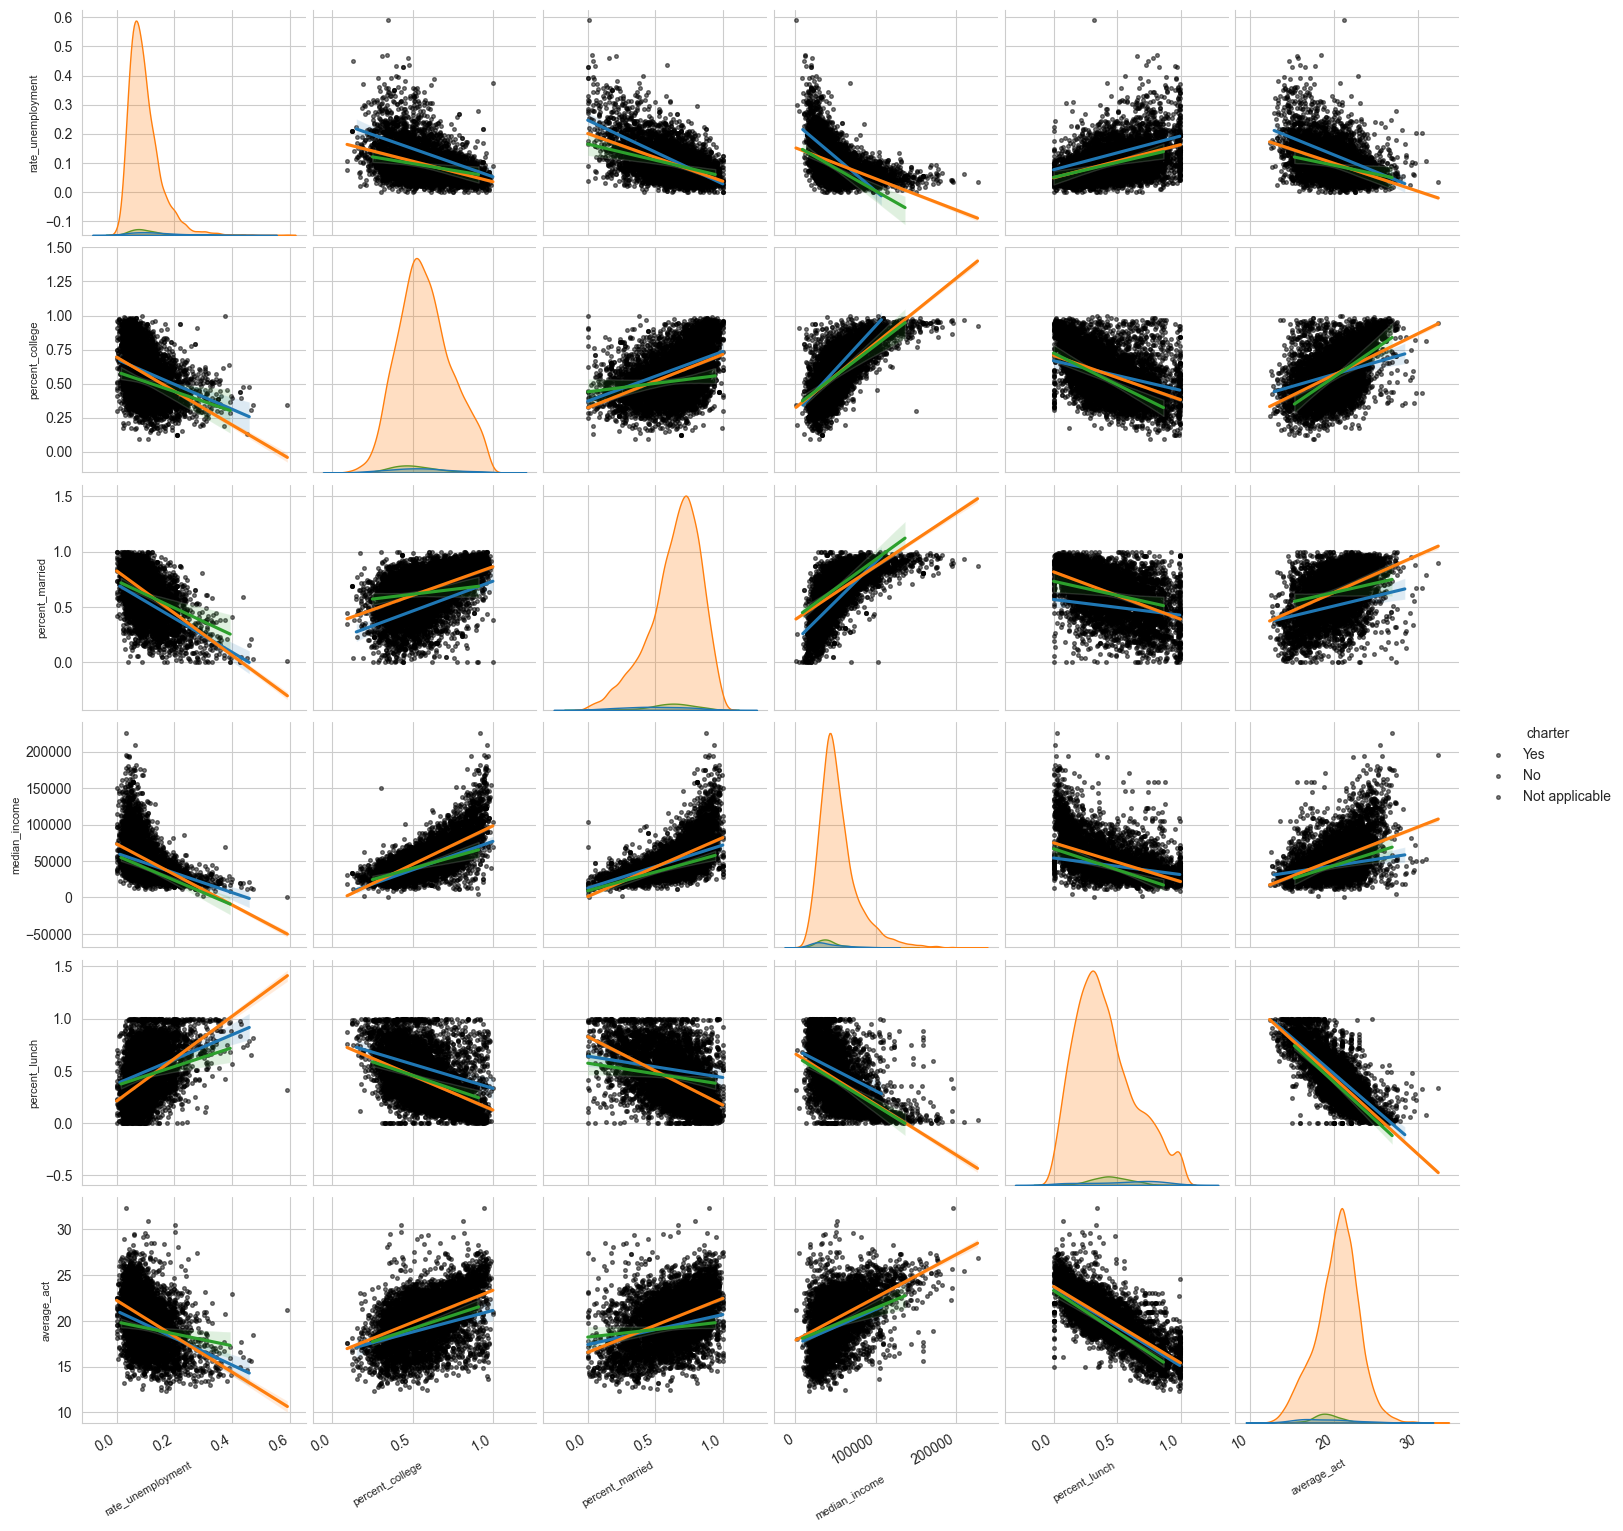

In [162]:
fig = sns.pairplot(
    data = df,
    vars= numerical_predictors + ['average_act'],
    hue = 'charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}},
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == "CT Median Household Income":
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

    #rotate x axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

On diagonal, we have distributions of individual numerical predictors. and then we have scatterplot with regression lines that are plotted for the different value of each charter

1. There are relationship between the socioeconomic predictors and ACT average ( bottom row of the pair plot)
2. The relationship are quite similar between the different values wether the school is a charter school or not
3. There are also relationship between socioeconomic variables, as we saw  with the correlation coeffients

## Modeling
We fit a multiple linear regression model using all socioeconomic predictors to quantify their effects on ACT scores.

In [179]:
model = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', data =df).fit()

#print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:49:07   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

- rate_unemployment, percent_college, and percent_lunch  all have meaningful effects on ACT scores.
- percent_married and median_income have large p-values and do not contribute significantly.

### Residual Analysis
Residual plots help assess model fit and detect potential issues.

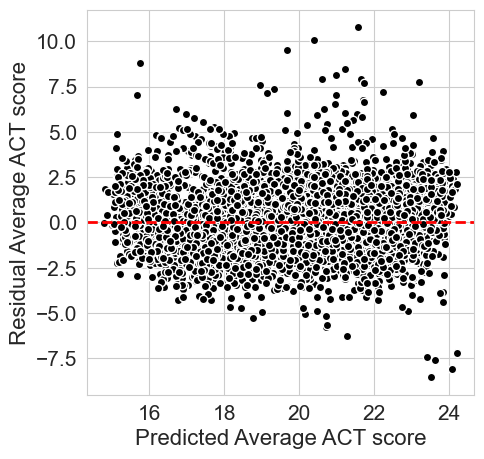

In [180]:
# Predicted values
y_hat = model.predict()

# Plot residuals
plt.figure(figsize=(5,5))

plt.plot(y_hat, model.resid,"ko",mec = "w")
plt.axhline(0, color='r', linestyle= 'dashed', lw=2)

plt.xlabel('Predicted Average ACT score', fontsize=16)
plt.ylabel('Residual Average ACT score', fontsize=16)

plt.tick_params(labelsize=15)
plt.show()

### Model Evaluation
We compute numerical metrics to quantify performance.

In [178]:
mae = mean_absolute_error(df['average_act'], y_hat)
r2 = r2_score(df['average_act'], y_hat)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 1.62
R-squared (R²): 0.282


MAE = 1.62 → on average, predicted ACT scores are within 1.6 points of actual scores.

R² = 0.282 → about 28% of the variation in ACT scores is explained by unemployment rate and percent college.

This model captures part of the effect of socioeconomic factors but leaves substantial variation unexplained. Additional predictors may improve accuracy.